## Francisco Antonio Morales Hernandez Carnet: 2019 00 2196


In [283]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
dataSet = np.load('/home/francisco/Desktop/data_science_python/pyProject/proyecto_training_data.npy') 
print('El dataSet es de tipo:', type(dataSet), "cuya dimension es:", dataSet.shape, 
       'y es un tensor de rango:', dataSet.ndim)
Columnas = ["Precio real","Calidad Acabados","Pies Cuadrados","Total de Cuartos","Anio de Construccion",
            "Pies lineales Calle"]
pandasDSet = pd.DataFrame(dataSet,columns=Columnas)

El dataSet es de tipo: <class 'numpy.ndarray'> cuya dimension es: (1460, 6) y es un tensor de rango: 2


A continuacion se realiza la division del dataset:

1. Precio de venta
2. Calidad del acabado
3. Pies cuadrados del primer piso
4. Numero total de cuartos
5. Anio de construccion
6. Pies lineales a la calle

A continuacion se presenta el toal de datos a trabajar:

In [275]:
pandasDSet

,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


Como siguiente punto se procede a la division del 80 porciento de la data utilizada para entrenar el modelo y el 20 porciento para la corroboracion del modelo como tal

In [59]:
trainingData = dataSet[:int(0.8*dataSet.shape[0])][:]
print(type(trainingData))
validData = dataSet[int(0.8*dataSet.shape[0]):][:]
print("Division del 80 porciento", trainingData.shape)
print("Division del 20 porciento",validData.shape)

<class 'numpy.ndarray'>
Division del 80 porciento (1168, 6)
Division del 20 porciento (292, 6)


In [228]:
#Se separa la variable Y del resto:
Yreal = trainingData[:,0]
totalX = trainingData[:,1:8]
print(totalX.ndim,totalX.shape)

#ANALISIS EXPLORATORIO DE DATOS
mediaVect = np.nanmean(totalX,axis=0)
valMax = np.nanmax(totalX,axis=0)
valMin = np.nanmin(totalX,axis=0)
StandDev = np.nanstd(totalX, axis=0)
exploAnalisis = {"Media":mediaVect, "Val. Max.":valMax, "Val. Min.":valMin, "Desv. Estandard":StandDev}
dfExplo = pd.DataFrame(exploAnalisis, index = ["Calidad Acabados","Pies Cuadrados","Total de Cuartos","Anio de Construccion",
            "Pies lineales de Calle"])

dfExplo

2 (1168, 5)


,Media,Val. Max.,Val. Min.,Desv. Estandard
Calidad Acabados,6.101027,10.0,1.0,1.377435
Pies Cuadrados,1156.323630,3228.0,334.0,373.620332
Total de Cuartos,6.485445,14.0,2.0,1.608452
Anio de Construccion,1971.451199,2010.0,1875.0,29.938882
Pies lineales de Calle,69.946985,313.0,21.0,23.465955


Los rangos de los valores presentados tienen la siguiente correspondencia para cada variable:

In [331]:
exploDSet =pandasDSet.describe()
exploDSet.drop(['25%','50%','75%','count'])

,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [330]:
peakMin = np.array(exploDSet.iloc[3])
peakMax = np.array(exploDSet.iloc[-1])
peakTopeakList = []
for i in range(len(peakMin)):
    peakTopeakList.append(str(peakMin[i])+' , '+str(peakMax[i]))

peakDF = pd.DataFrame({'Rango':peakTopeakList[1:]},index = ["Calidad Acabados","Pies Cuadrados","Total de Cuartos","Anio de Construccion",
            "Pies lineales de Calle"])
peakDF

,Rango
Calidad Acabados,"1.0 , 10.0"
Pies Cuadrados,"334.0 , 4692.0"
Total de Cuartos,"2.0 , 14.0"
Anio de Construccion,"1872.0 , 2010.0"
Pies lineales de Calle,"21.0 , 313.0"


A continuacion se presenta un histograma de cada variable:

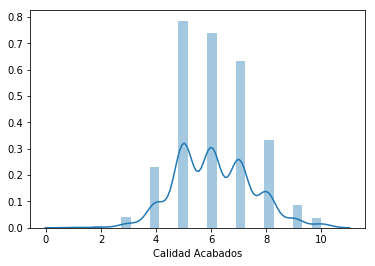

In [237]:
ax = sns.distplot(pandasDSet["Calidad Acabados"])

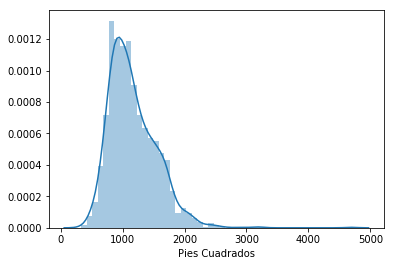

In [238]:
ax = sns.distplot(pandasDSet["Pies Cuadrados"])

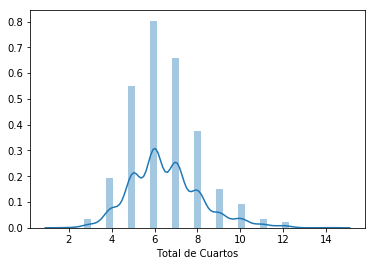

In [239]:
ax = sns.distplot(pandasDSet["Total de Cuartos"])

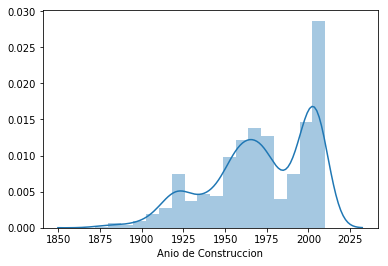

In [240]:
ax = sns.distplot(pandasDSet["Anio de Construccion"])

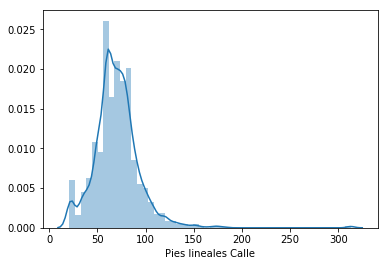

In [241]:
ax = sns.distplot(pandasDSet["Pies lineales Calle"].dropna())

A continuacion se realiza el calculo del coeficiente de correlacion para cada variable:

In [266]:
pandasDSet.corr()

,Precio real,Calidad Acabados,Pies Cuadrados,Total de Cuartos,Anio de Construccion,Pies lineales Calle
Precio real,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
Calidad Acabados,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
Pies Cuadrados,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
Total de Cuartos,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
Anio de Construccion,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
Pies lineales Calle,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


Tomando en cuenta unicamente los coeficientes de correlacion, las mejores variables son la Calidad en los Acabados y los Pies Cuadrados.

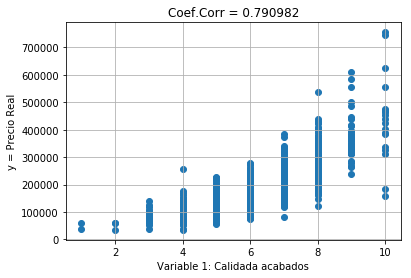

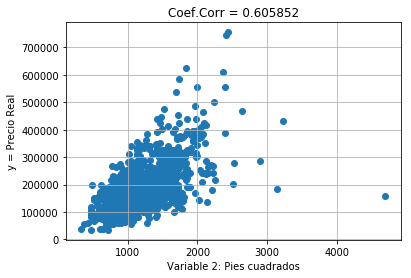

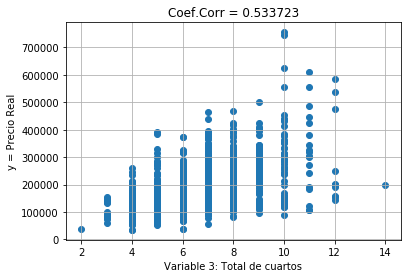

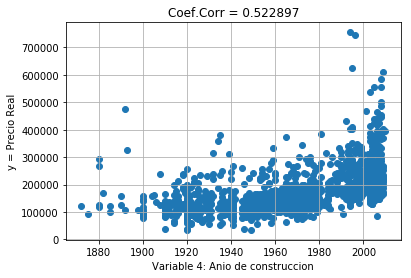

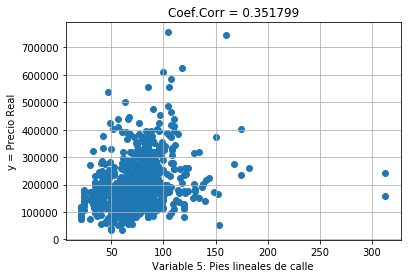

In [343]:
y  =  pandasDSet["Precio real"]
x1 =  pandasDSet["Calidad Acabados"]
x2 = pandasDSet["Pies Cuadrados"]
x3 = pandasDSet["Total de Cuartos"]
x4 = pandasDSet["Anio de Construccion"]
x5 = pandasDSet["Pies lineales Calle"]


fig = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()

ax1 = fig.add_subplot(1,1,1) 
ax2 = fig2.add_subplot(1,1,1)
ax3 = fig3.add_subplot(1,1,1)
ax4 = fig4.add_subplot(1,1,1)
ax5 = fig5.add_subplot(1,1,1)


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()


ax1.scatter(x1,y,label = "Coef.Corr = 0.790982") #
ax2.scatter(x2,y,label = "Coef.Corr = 0.605852")
ax3.scatter(x3,y,label = "Coef.Corr = 0.533723")
ax4.scatter(x4,y,label = "Coef.Corr = 0.522897")
ax5.scatter(x5,y,label = "Coef.Corr = 0.351799")




#ax.legend() #si no ejecutamos la función "legend" , no se mostraran los labels usados con plot
ax1.set_xlabel('Variable 1: Calidada acabados')
ax1.set_ylabel('y = Precio Real')
ax1.set_title("Coef.Corr = 0.790982")

ax2.set_xlabel('Variable 2: Pies cuadrados')
ax2.set_ylabel('y = Precio Real')
ax2.set_title("Coef.Corr = 0.605852")

ax3.set_xlabel('Variable 3: Total de cuartos')
ax3.set_ylabel('y = Precio Real')
ax3.set_title("Coef.Corr = 0.533723")

ax4.set_xlabel('Variable 4: Anio de construccion')
ax4.set_ylabel('y = Precio Real')
ax4.set_title("Coef.Corr = 0.522897")

ax5.set_xlabel('Variable 5: Pies lineales de calle')
ax5.set_ylabel('y = Precio Real')
ax5.set_title("Coef.Corr = 0.351799")

plt.show()

Creacion del modelo de regresion lineal utilizando iteraciones:

In [466]:
def trainingFunction(x, y, ite,showError, learnR):
    count = 0
    errorVect = np.array([np.nan])
    mb = np.array([0.2,0.8]) #VALORES INICIALES DE m y b
    onesVect = np.ones_like(x)
    X = np.append(x,onesVect,axis = 1) #CREACION DE MATRIX [X UNOS]
    mbDict = {}
    while(count<ite):
        count+=1    
        
        #CALCULO DE Y_HAT
        Y_hat = np.matmul(X,mb)
        Y_hat = Y_hat[:,np.newaxis]
        #print('IMPRESION DE YHAT\n', Y_hat)
        
        
        #CALCULO DEL ERROR PROMEDIO
        errorProm = 0.5*np.mean(np.power(y - Y_hat,2),axis=0)
        #print('IMPRESION DEL ERROR PROM',errorProm)
        
        
        #ALMACENANDO EL ERROR EN UN VECTOR
        errorVect = np.append(errorVect, errorProm,axis = 0)
        if (count%showError == 0):
            print('El error del presente modelo es: ', errorProm,'el numero de iteracion es:',count)
        #print('IMPRESION DEL ERROR VECT',errorVect)
        
        
        #CALCULO DEL GRADIENTE
        gradVect = np.mean(X*(Y_hat-y),axis=0)
        #print('IMPRESION DEL GRADVECTOR', gradVect)
        
        
        #CALCULO DEL MODELO mb
        mb -= gradVect*learnR
        mbDict[count] = np.copy(mb)
        #print('IMPRESION DEL MB NUEVO', mbDict)
        
    return (mbDict,errorVect[1:])

In [467]:
modelos, errVector = trainingFunction(np.array([pandasDSet['Calidad Acabados']]).transpose(), 
                np.array([pandasDSet['Precio real']]).transpose(), 
                ite = 3, showError = 1, learnR = 0.00003)

El error del presente modelo es:  [1.95192511e+10] el numero de iteracion es: 1
El error del presente modelo es:  [1.94757889e+10] el numero de iteracion es: 2
El error del presente modelo es:  [1.94324311e+10] el numero de iteracion es: 3


Visualizacion en tiempo real del entrenamiento del modelo

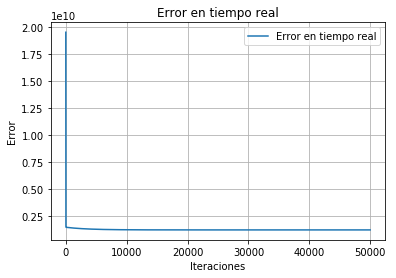

In [458]:
errVector.shape[0]

def visualizacionError(errVect):
    x = np.arange(errVect.shape[0])
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.plot(x,errVect,label='Error en tiempo real')
    ax.legend()
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Error')
    ax.set_title('Error en tiempo real')
    plt.show
    
visualizacionError(errVector)